# Week 10 Independent Lab: Decision Trees     &#x1f333;

Upper management has asked to build decision trees given the provided hospital data.   &#x1f3e5;

In [1]:

# load modules

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# for displaying the tree

import graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

In [3]:

# Load in the hospital data

hospital = pd.read_table('data/calihospital.txt')

# Print to confirm
hospital.head(5)

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


Great, now that we have the table loaded into python! In order to build a decision tree model we need to determine candidates for the predictor variables. Let's start by taking a look at the variables in the dataframe:

In [4]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

We can start narrowing down our candidates by determining which variables we determine to not be impactful. These variables include various ID's, website, and zip code. <br>
<br>
With those variables out of consideration, it is important to keep in mind that we want to select models that are highly correlated. We can do this buy building a table displaying the various correlations:    

In [6]:

# Select all of the relevant numerical variables

numerical_hospital = (hospital
                     .filter([
                         'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInc','AvlBeds'
                     ]))

# Print out the correlation

numerical_hospital.corr()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.000000,0.903827,0.938051,0.880295,0.896387,-0.072314,0.881333
NetPatRev,0.903827,1.000000,0.979109,0.960232,0.998765,0.220149,0.887727
InOperExp,0.938051,0.979109,1.000000,0.935863,0.979817,0.071781,0.925521
OutOperExp,0.880295,0.960232,0.935863,1.000000,0.955239,0.056218,0.826892
OperRev,0.896387,0.998765,0.979817,0.955239,1.000000,0.234270,0.890018
OperInc,-0.072314,0.220149,0.071781,0.056218,0.234270,1.000000,0.041857
AvlBeds,0.881333,0.887727,0.925521,0.826892,0.890018,0.041857,1.000000


# Making some trees

Now that we have a foundational understanding of the dataframe and what we need to start determining the predictor candidates, let's now go on and plant some trees!!!

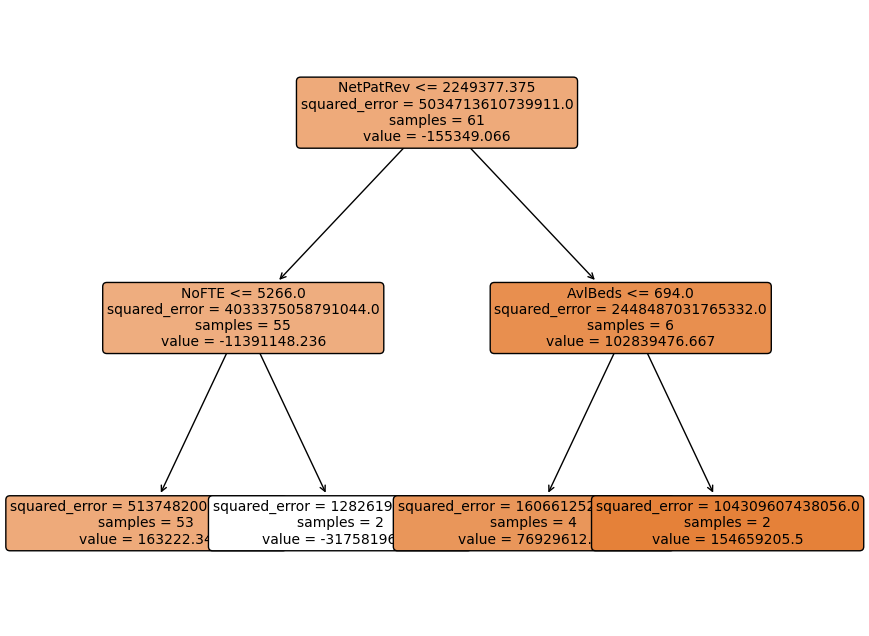

In [9]:

############################
# Target Variable: OperInc #
############################

# Create a subset excluding the target variable

hospital_subset_1 = (hospital
                    .filter([
                        'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','AvlBeds'
                    ]))

# Categorical Variables

hospital_dummy = (hospital
                 .filter([
                     'TypeControl','Teaching','DonorType'
                 ]))

# Convert the categorical vairables into dummy variables

dummies = pd.get_dummies(hospital_dummy, drop_first=True)

# Merge numerical and dummy variables

tree_data_1 = pd.merge(hospital_subset_1, dummies, left_index=True, right_index=True)

#Create the regression tree

tree_1 = tree.DecisionTreeRegressor(max_depth=2).fit(tree_data_1, hospital['OperInc'])

# Create labels for the plot

plot_colnames1 = list(tree_data_1.columns.values)

# Create the Plot

plt.figure(figsize=(10,8))
tree.plot_tree(tree_1, feature_names=plot_colnames1, filled=True, rounded=True, fontsize=10)
plt.show()



We can see in the decision tree above, that the first split is based upon the NetPatRev (Net Patient Revenue) variable. This checks out given that the target variable is Operating Income. The higher the net patient revenue, the higher the operating income. <br>
<br>
With the decision tree made with OperInc as the target variable, let's now look at another decision tree with OperRev as the target variable

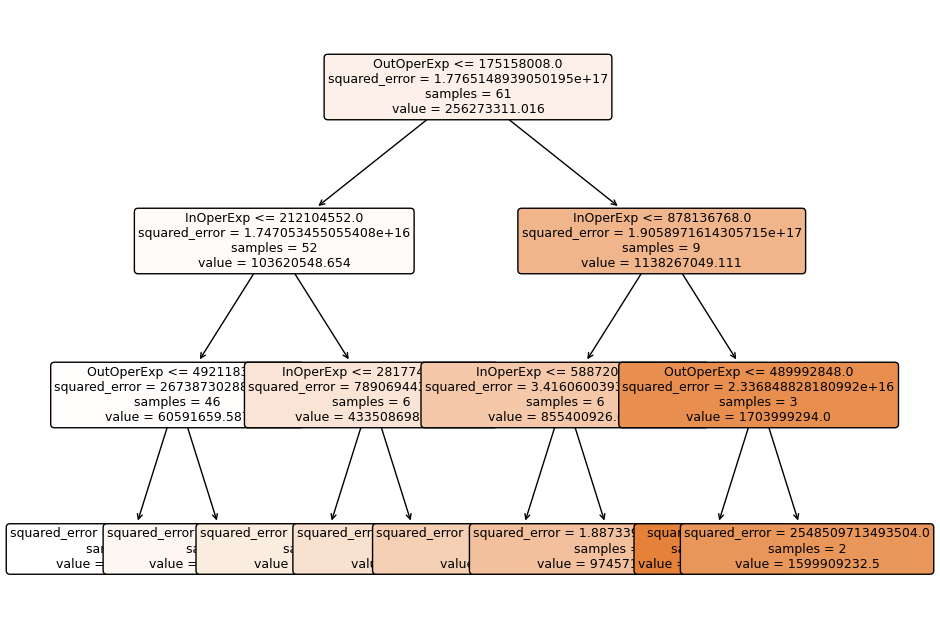

In [11]:

############################
# Target Variable: OperRev #
############################

# Create the subset

hospital_subset_2 = (hospital
                    .filter([
                        'NoFTE','InOperExp','OutOperExp','AvlBeds'
                    ]))

# Merge numerical and dummy variables

tree_data_2 = pd.merge(hospital_subset_2, dummies, left_index=True, right_index=True)

# Create the regression tree

tree_2 = tree.DecisionTreeRegressor(max_depth=3).fit(tree_data_2,hospital['OperRev'])

# Create labels for the plot

plot_colnames2 = list(tree_data_2.columns.values)

# Create the plot

plt.figure(figsize=(10,8))
tree.plot_tree(tree_2, feature_names=plot_colnames2, filled=True, rounded=True, fontsize=9)

plt.show()

We can see that the initial split is with Outpatient Operating Expenses. Given that the target variable is Operating Revenue, this is a little confusing at first. Given that this is targeting revenue and income, expenses may not make sense at first as the first split. However, if a hospital is larger, it may likely have higher total expenses, thus increasing the likelihood of having more revenue. <br>
<br>
With the two decision trees that we have gone over being numerical, let's now dive into planting some categorical decision trees!!!

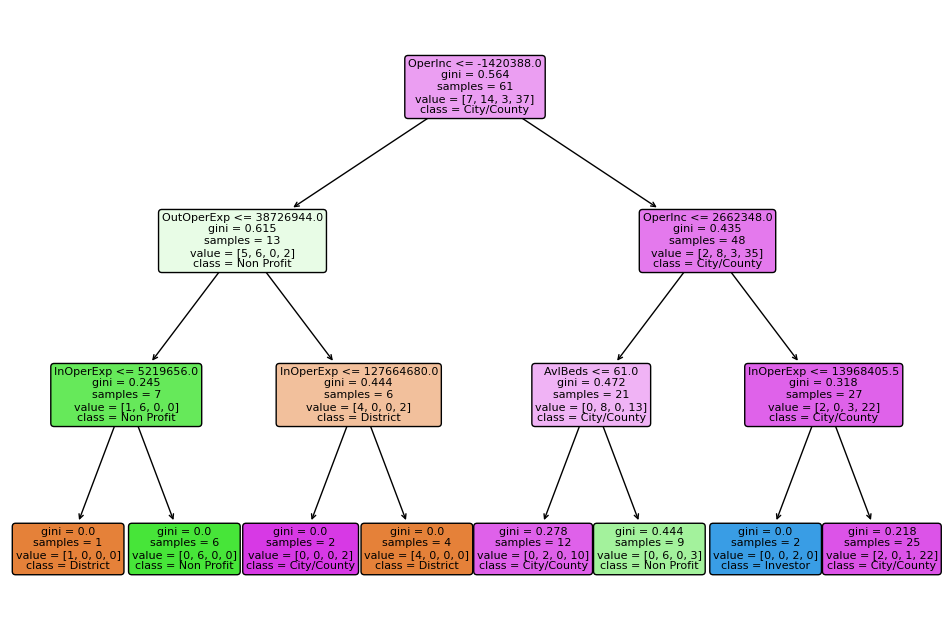

In [13]:

################################
# Target Variable: TypeControl #
################################

# Create the numerical subset

hospital_subset_3 = (hospital
                    .filter([
                        'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'
                    ]))

# Subset for the categorical variables

hospital_dummy2 = (hospital
                  .filter([
                      'Teaching','DonorType'
                  ]))

# Convert categorical to dummy

dummies_2 = pd.get_dummies(hospital_dummy2,drop_first=True)

# Merge the subsets

tree_data_3 = pd.merge(hospital_subset_3, dummies_2, left_index=True, right_index=True)

# Create the classification tree

tree_3 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_3, hospital['TypeControl'])

# Create plot labels

plot_colnames3 = list(tree_data_3.columns.values)
classnames1 = list(hospital.TypeControl.unique())

# Create the plot

plt.figure(figsize=(12,8))
tree.plot_tree(tree_3, feature_names=plot_colnames3, class_names=classnames1, filled=True, rounded=True,fontsize=8)

plt.show()

We can see in the classification tree above that the first split is based on Operating income. If the operating income is on the high end, then it is more likely to be a City/County hospital. This makes sense, as these hospitals in citys have higher populations and thus will have more potential "clients". On the other hand, if the Income and expenses are lower, than the hospital is more likely to either be a District or Non Profit hospital. This also makes sense. These hospitals are likely on the smaller side, and thus will have lower revenues, incomes, and expenses due to lack of "client" pool. <br>
<br>
Great! Now let's move on and take a look at one more tree:

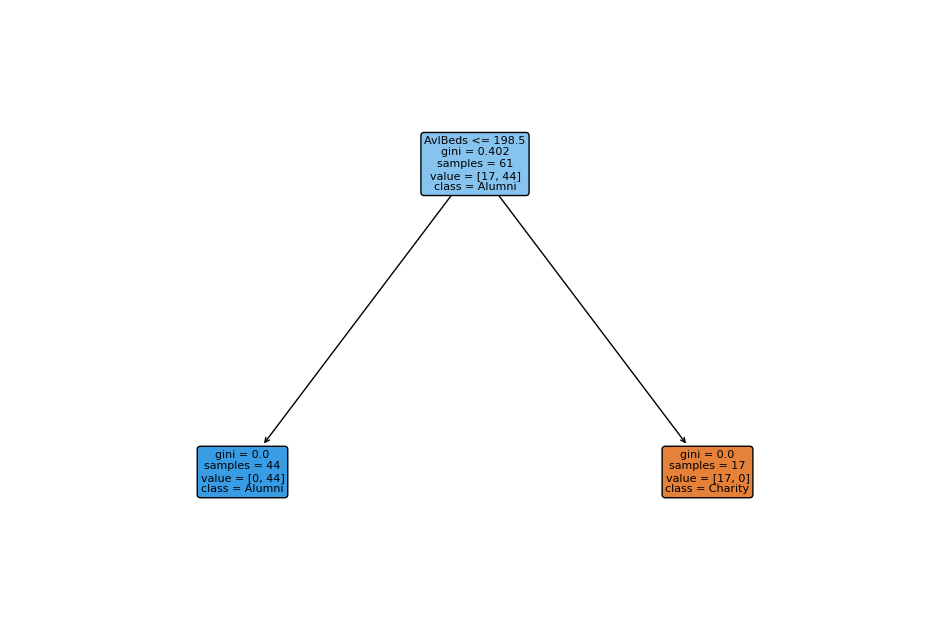

In [15]:

##############################
# Target Variable: DonorType #
##############################

# We already have the subset from the previous tree for the numerical variables

# Subset for the categorical variables

hospital_dummy3 = (hospital
                  .filter([
                      'Teaching','TypeControl'
                  ]))

# Convert the categorical variables to dummies

dummies_3 = pd.get_dummies(hospital_dummy3, drop_first=True)

# Merge the subsets

tree_data_4 = pd.merge(hospital_subset_3, dummies_3, left_index=True, right_index=True)

# Create the classification tree

tree_4 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_4, hospital['DonorType'])

#Create Labels

plot_colnames4 = list(tree_data_4.columns.values)
classnames2 = list(hospital.DonorType.unique())

# Create the plot

plt.figure(figsize=(12,8))
tree.plot_tree(tree_4, feature_names=plot_colnames4, class_names=classnames2, filled=True, rounded=True, fontsize=8)

plt.show()

The tree above is fairly simple. The split seems to be made at the available beds. If the hospital has fewer than 198 beds available, then it is likely an Alumi donor type. If there are greater than 198 available beds at a hospital, then it is likely a Charity donor for the hospital. 

## Selecting a tree

For the selected tree, the first tree with the Operating Income as that target variable is the tree that I would select. This is based upon its application. I believe that with this model, the operating income of various hospitals can be predicted and may provide insight into what hospitals may need some additional help. <br>
<br>
Thank you so much for going through my week 10 independent lab, I hope you enjoyed!     &#x1f601;